In [1]:
!pip install pandas

Defaulting to user installation because normal site-packages is not writeable


In [2]:
pip install yfinance==0.2.28

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib as mpl

In [7]:
import yfinance as yf
import datetime

# Set the start and end dates
start_date = datetime.datetime(2018, 1, 1)
end_date = datetime.datetime(2019, 12, 31)

# Ticker symbol for Llyods (LON:LLOY for London Stock Exchange)
ticker_symbol = "LLOY.L"

# Download historical data
llyods_data = yf.download(ticker_symbol, start=start_date, end=end_date)

# Display the downloaded data
print(llyods_data.head())

[*********************100%%**********************]  1 of 1 completed
                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2018-01-02  68.199997  68.730003  67.430000  67.699997  49.539238  125462019
2018-01-03  67.809998  67.889999  67.220001  67.470001  49.370949  109305648
2018-01-04  68.029999  68.440002  67.550003  68.059998  49.802673  115241609
2018-01-05  68.260002  68.260002  67.709999  68.070000  49.809998  125031209
2018-01-08  68.360001  68.430000  67.930000  68.059998  49.802673   86290911


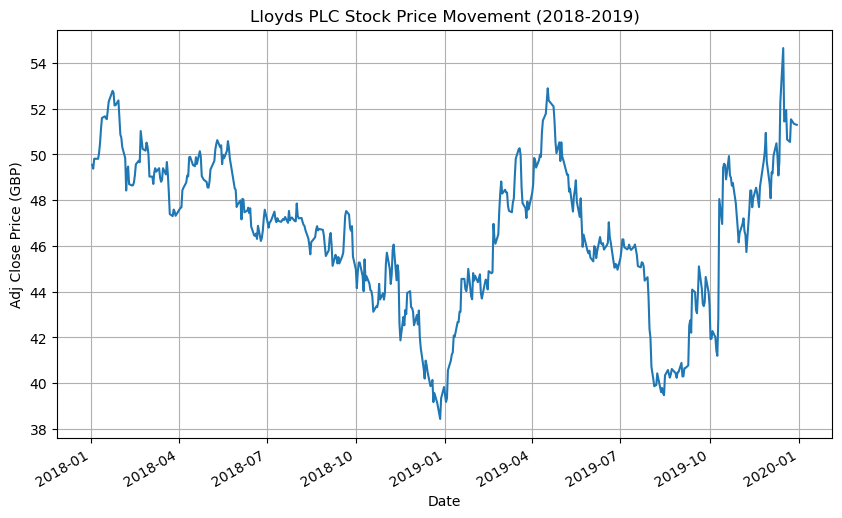

In [18]:
import yfinance as yf
import datetime
import matplotlib.pyplot as plt

# Plot the equity price movement
plt.figure(figsize=(10, 6))
llyods_data['Adj Close'].plot(title='Lloyds PLC Stock Price Movement (2018-2019)')
plt.xlabel('Date')
plt.ylabel('Adj Close Price (GBP)')
plt.grid(True)
plt.show()

In [21]:
import yfinance as yf
import datetime

# Calculate daily returns
llyods_data['Daily Return'] = llyods_data['Adj Close'].pct_change()

# Calculate annualized average return
average_daily_return = llyods_data['Daily Return'].mean()
annualized_return = (1 + average_daily_return)**252 - 1  # 252 trading days in a year

print(f"Annualized Average Return: {annualized_return * 100:.2f}%")


Annualized Average Return: 4.36%


In [22]:
# Calculate daily returns
llyods_data['Daily Return'] = llyods_data['Adj Close'].pct_change()

# Calculate annualized standard deviation
annualized_std_dev = llyods_data['Daily Return'].std() * (252 ** 0.5)  # 252 trading days in a year

print(f"Annualized Standard Deviation: {annualized_std_dev * 100:.2f}%")

Annualized Standard Deviation: 22.68%


In [26]:
import yfinance as yf
import datetime
import numpy as np

# Calculate log returns
llyods_data['Log Return'] = np.log(1 + llyods_data['Adj Close'].pct_change())

# Display the DataFrame with log returns
print(llyods_data[['Adj Close', 'Log Return']].head())


            Adj Close  Log Return
Date                             
2018-01-02  49.539242         NaN
2018-01-03  49.370945   -0.003403
2018-01-04  49.802662    0.008706
2018-01-05  49.810001    0.000147
2018-01-08  49.802662   -0.000147


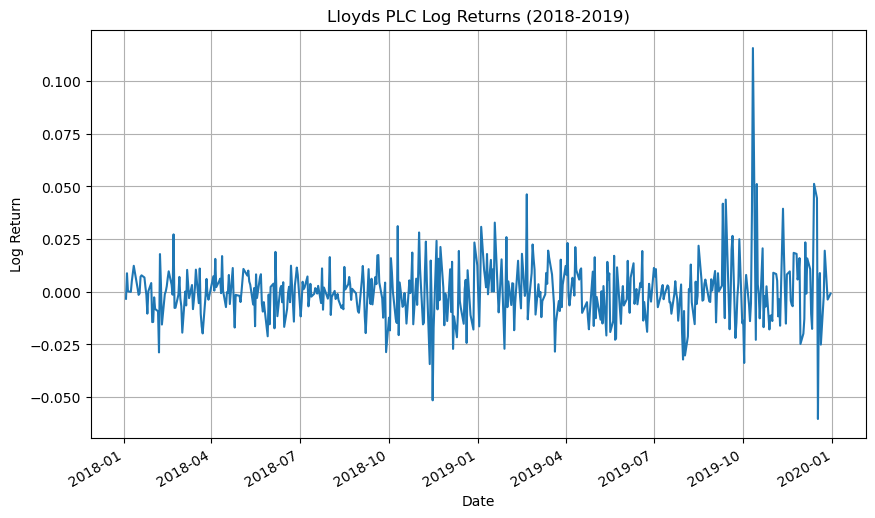

In [27]:
# Plot the log returns
plt.figure(figsize=(10, 6))
llyods_data['Log Return'].plot(title='Lloyds PLC Log Returns (2018-2019)')
plt.xlabel('Date')
plt.ylabel('Log Return')
plt.grid(True)
plt.show()

In [47]:
import datetime

start_date = datetime.datetime(2018, 1, 1)
end_date = datetime.datetime(2018, 3, 31)

days_to_expiration = (end_date - start_date).days
t = days_to_expiration / 365

In [32]:
# Calculate log returns
llyods_data['Log Return'] = np.log(1 + llyods_data['Adj Close'].pct_change())

# Calculate and display volatility for the specified period
volatility = llyods_data['Log Return'].std()

print(f"Volatility (Standard Deviation of Log Returns) from January 2018 to March 2018: {volatility * 100:.2f}%")


Volatility (Standard Deviation of Log Returns) from January 2018 to March 2018: 0.95%


In [33]:
S = 49.53              # spot stock price (Adj stock price as on 2nd Jan'2018)
K = 55                  # strike (Assumption)
T = 0.21                # maturity (77/365) 
r = 0.01                # risk free rate (UK Bond Price as on 2nd Jan'2018 - 1.239%)
sigma = 0.95            # volatility
N = 5                   # number of periods or number of time steps  


In [39]:
import numpy as np
import os

S0 = 49.53                 # spot stock price
K = 55                  # strike
T = 0.21                # maturity 
r = 0.01                # risk free rate 
sigma = 0.95            # diffusion coefficient or volatility
N = 5                   # number of periods or number of time steps  
payoff = "call"         # payoff 

dT = float(T) / N                             # Delta t
u = np.exp(sigma * np.sqrt(dT))               # up factor
d = 1.0 / u                                   # down factor 

S = np.zeros((N + 1, N + 1))
S[0, 0] = S0
z = 1
for t in range(1, N + 1):
    for i in range(z):
        S[i, t] = S[i, t-1] * u
        S[i+1, t] = S[i, t-1] * d
    z += 1
    
a = np.exp(r * dT)    # risk free compound return
p = (a - d)/ (u - d)  # risk neutral up probability
q = 1.0 - p           # risk neutral down probability
p

S_T = S[:,-1]
V = np.zeros((N + 1, N + 1))
if payoff =="call":
    V[:,-1] = np.maximum(S_T-K, 0.0)
elif payoff =="put":
    V[:,-1] = np.maximum(K-S_T, 0.0)
V

# for European Option
for j in range(N-1, -1, -1):
    for i in range(j+1):
        V[i,j] = np.exp(-r*dT) * (p * V[i,j + 1] + q * V[i + 1,j + 1])
V

print('European ' + payoff, str( V[0,0]))

European call 6.751626224870174


In [41]:
payoff = "put" 
S_T = S[:,-1]
V = np.zeros((N + 1, N + 1))
if payoff =="call":
    V[:,-1] = np.maximum(S_T-K, 0.0)
elif payoff =="put":
    V[:,-1] = np.maximum(K-S_T, 0.0)
V

# for European Option
for j in range(N-1, -1, -1):
    for i in range(j+1):
        V[i,j] = np.exp(-r*dT) * (p * V[i,j + 1] + q * V[i + 1,j + 1])
V

print('European ' + payoff, str( V[0,0]))

European put 12.10624741502223


In [44]:
import numpy as np
from scipy.stats import norm

def black_scholes_call(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    
    call_price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    return call_price

def black_scholes_put(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    
    put_price = K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)
    return put_price

# Given parameters
S = 49.53    # spot stock price (Adj stock price as on 2nd Jan'2018)
K = 55       # strike (Assumption)
T = 0.21     # maturity (77/365)
r = 0.01     # risk-free rate (UK Bond Price as on 2nd Jan'2018 - 1.239%)
sigma = 0.95 # volatility

# Calculate call and put option prices
call_price = black_scholes_call(S, K, T, r, sigma)
put_price = black_scholes_put(S, K, T, r, sigma)

# Display the results
print(f"BS Call Option Price: {call_price:.4f}")
print(f"BS Put Option Price: {put_price:.4f}")


BS Call Option Price: 6.5636
BS Put Option Price: 11.9182


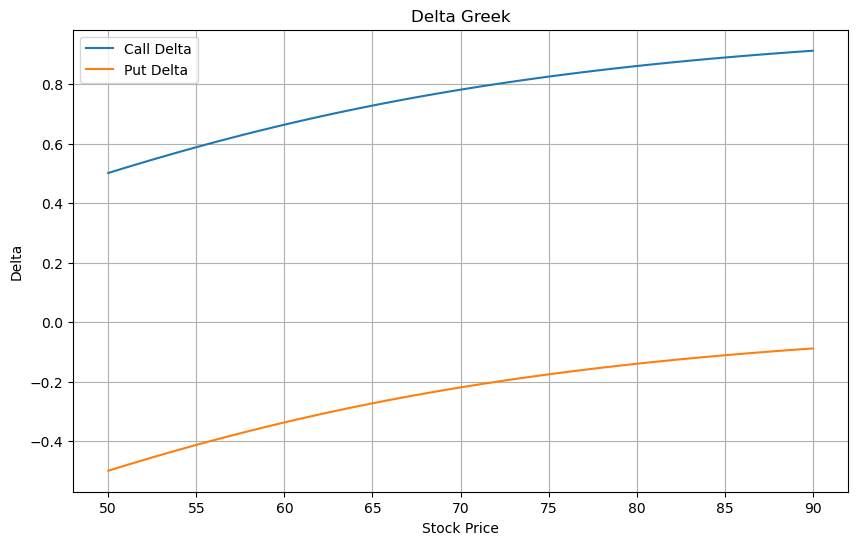

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Define parameters
S_min = 50  # Minimum stock price
S_max = 90  # Maximum stock price
K = 55  # Strike price
r = 0.01  # Risk-free interest rate
T = 0.21  # Time to expiration in years
sigma = 0.95  # Volatility

# Generate a range of stock prices
n_points = 100  # Number of points on the x-axis
S_range = np.linspace(S_min, S_max, n_points)

# Calculate d1 using the Black-Scholes-Merton formula
d1 = (np.log(S_range / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))

# Calculate delta for a call option
call_delta = norm.cdf(d1)

# Calculate delta for a put option
put_delta = call_delta - 1

# Plot the delta values
plt.figure(figsize=(10, 6))
plt.plot(S_range, call_delta, label='Call Delta')
plt.plot(S_range, put_delta, label='Put Delta')
plt.xlabel('Stock Price')
plt.ylabel('Delta')
plt.title('Delta Greek')
plt.legend()
plt.grid(True)
plt.show()


In [50]:
import numpy as np
from scipy.stats import norm

# Define parameters
S = 49.53  # Current stock price
K = 55  # Strike price
r = 0.01  # Risk-free interest rate
T = 0.21  # Time to expiration in years
sigma = 0.95  # Volatility

# Calculate d1 using the Black-Scholes-Merton formula
d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))

# Calculate delta for a call option
call_delta = norm.cdf(d1)

# Calculate delta for a put option
put_delta = norm.cdf(d1) - 1

# Print the delta values
print(f"Call Delta: {call_delta:.4f}")
print(f"Put Delta: {put_delta:.4f}")


Call Delta: 0.4928
Put Delta: -0.5072


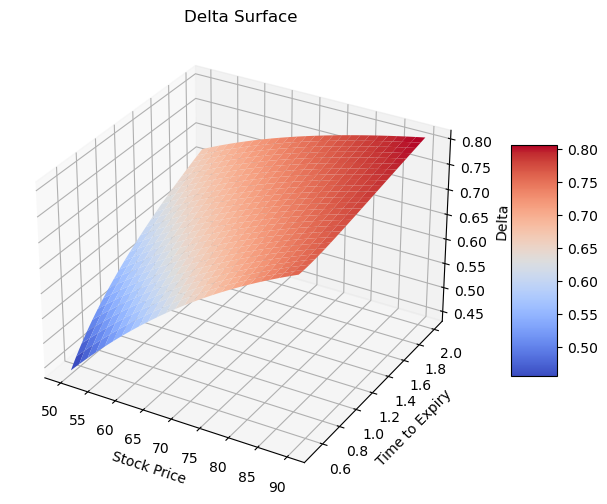

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from mpl_toolkits.mplot3d import Axes3D

def delta(S, K, T, r, vol, payoff):
    d1 = (np.log(S / K) + (r + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    
    if payoff == "call":
        delta = norm.cdf(d1, 0.0, 1.0)
    elif payoff == "put":
        delta = norm.cdf(d1, 0.0, 1.0) - 1
    
    return delta

# Given parameters
S_min = 50  # Minimum stock price
S_max = 90  # Maximum stock price
K = 70  # Strike price
r = 0.01  # Risk-free interest rate
T = 77/365  # Time to expiration in years
sigma = 0.95  # Volatility

# Generate a range of stock prices
S = np.linspace(S_min, S_max, 51)

# Generate a range of time to expiry values
T_values = np.linspace(0.5, 2, 51)

# Initialize a matrix to store delta values
Delta = np.zeros((len(T_values), len(S)))

# Calculate delta values for different stock prices and time to expiry
for j in range(len(S)):
    for i in range(len(T_values)):
        Delta[i, j] = delta(S[j], K, T_values[i], r, sigma, 'call')

# Create a 3D surface plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(projection='3d')
S, T_values = np.meshgrid(S, T_values)
surf = ax.plot_surface(S, T_values, Delta, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)

# Set plot labels and title
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Delta')
ax.set_title('Delta Surface')

# Add a colorbar for reference
fig.colorbar(surf, shrink=0.5, aspect=5)

# Show the plot
plt.show()


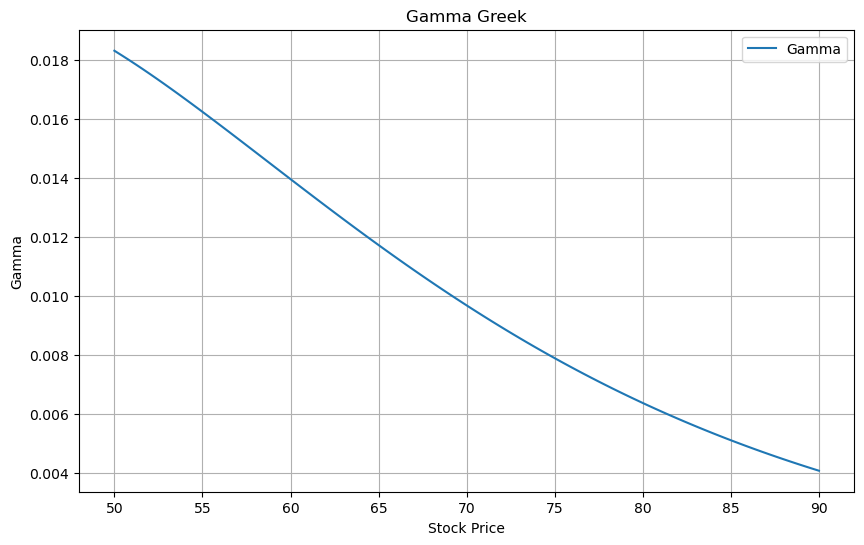

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Define parameters
S_min = 50  # Minimum stock price
S_max = 90  # Maximum stock price
K = 55  # Strike price
r = 0.01  # Risk-free interest rate
T = 0.21  # Time to expiration in years
sigma = 0.95  # Volatility

# Generate a range of stock prices
n_points = 100  # Number of points on the x-axis
S_range = np.linspace(S_min, S_max, n_points)

# Calculate d1 using the Black-Scholes-Merton formula
d1 = (np.log(S_range / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))

# Calculate Gamma
gamma = (np.exp(-d1**2 / 2) / (S_range * sigma * np.sqrt(T))) / (np.sqrt(2 * np.pi))

# Plot the gamma values
plt.figure(figsize=(10, 6))
plt.plot(S_range, gamma, label='Gamma')
plt.xlabel('Stock Price')
plt.ylabel('Gamma')
plt.title('Gamma Greek')
plt.legend()
plt.grid(True)
plt.show()


In [55]:
import numpy as np
from scipy.stats import norm

# Define parameters
S = 49.53  # Current stock price
K = 55  # Strike price
r = 0.01  # Risk-free interest rate
T = 0.21  # Time to expiration in years
sigma = 0.95  # Volatility

# Calculate d1 using the Black-Scholes-Merton formula
d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))

# Calculate gamma
gamma = (np.exp(-d1**2 / 2) / (S * sigma * np.sqrt(T))) / (np.sqrt(2 * np.pi))

# Print the gamma value for both call and put
print(f"Gamma for Call: {gamma:.4f}")
print(f"Gamma for Put: {gamma:.4f}")


Gamma for Call: 0.0185
Gamma for Put: 0.0185


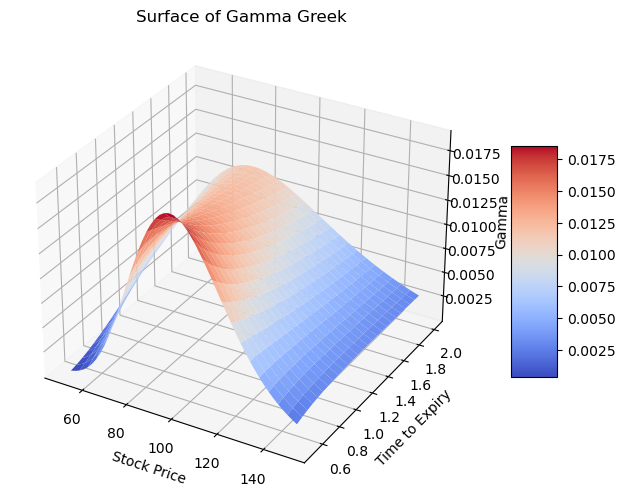

In [60]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D
import scipy.stats as si

# Given parameters
S_min = 50  # Minimum stock price
S_max = 150  # Maximum stock price
K = 105  # Strike price
r = 0.04  # Risk-free interest rate
T_min = 0.5  # Minimum time to expiration in years
T_max = 2  # Maximum time to expiration in years
sigma = 0.3  # Volatility

def gamma(S, K, T, r, vol, payoff):
    d1 = (np.log(S / K) + (r + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    gamma = si.norm.pdf(d1) / (vol * np.sqrt(T) * S)
    return gamma

# Generate a range of stock prices and times to expiration
S_range = np.linspace(S_min, S_max, 51)
T_range = np.linspace(T_min, T_max, 51)

# Create a meshgrid for stock prices and times to expiration
S, T = np.meshgrid(S_range, T_range)

# Calculate Gamma for each combination of stock price and time to expiration
Gamma = np.zeros_like(S)
for i in range(len(T_range)):
    for j in range(len(S_range)):
        Gamma[i, j] = gamma(S_range[j], K, T_range[i], r, sigma, 'call')

# Plot the surface of Gamma
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(S, T, Gamma, cmap=cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Gamma')
ax.set_title('Surface of Gamma Greek')
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()


In [56]:
import numpy as np
from scipy.stats import norm

# Define parameters
S = 49.53  # Current stock price
K = 55  # Strike price
r = 0.01  # Risk-free interest rate
T = 0.21  # Time to expiration in years
sigma = 0.95  # Volatility

# Calculate d1 and d2 using the Black-Scholes-Merton formula
d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
d2 = d1 - sigma * np.sqrt(T)

# Calculate theta for a call option
theta_call = -((S * sigma * np.exp(-d1**2 / 2)) / (2 * np.sqrt(T * 2 * np.pi))) - r * K * np.exp(-r * T) * norm.cdf(-d2)

# Calculate theta for a put option
theta_put = -((S * sigma * np.exp(-d1**2 / 2)) / (2 * np.sqrt(T * 2 * np.pi))) + r * K * np.exp(-r * T) * norm.cdf(d2)

# Print the theta values
print(f"Theta for Call: {theta_call:.4f}")
print(f"Theta for Put: {theta_put:.4f}")


Theta for Call: -20.8486
Theta for Put: -20.2997


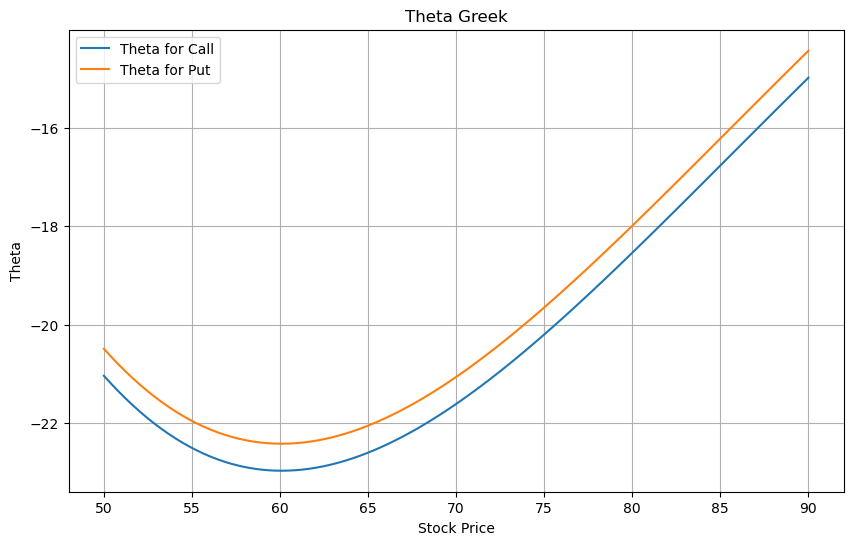

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Define parameters
S_min = 50  # Minimum stock price
S_max = 90  # Maximum stock price
K = 55  # Strike price
r = 0.01  # Risk-free interest rate
T = 0.21  # Time to expiration in years
sigma = 0.95  # Volatility

# Generate a range of stock prices
n_points = 100  # Number of points on the x-axis
S_range = np.linspace(S_min, S_max, n_points)

# Calculate d1 and d2 using the Black-Scholes-Merton formula
d1 = (np.log(S_range / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
d2 = d1 - sigma * np.sqrt(T)

# Calculate Theta for a call option
theta_call = -((S_range * sigma * np.exp(-d1**2 / 2)) / (2 * np.sqrt(T * 2 * np.pi))) - r * K * np.exp(-r * T) * norm.cdf(-d2)

# Calculate Theta for a put option
theta_put = -((S_range * sigma * np.exp(-d1**2 / 2)) / (2 * np.sqrt(T * 2 * np.pi))) + r * K * np.exp(-r * T) * norm.cdf(d2)

# Plot the theta values
plt.figure(figsize=(10, 6))
plt.plot(S_range, theta_call, label='Theta for Call')
plt.plot(S_range, theta_put, label='Theta for Put')
plt.xlabel('Stock Price')
plt.ylabel('Theta')
plt.title('Theta Greek')
plt.legend()
plt.grid(True)
plt.show()

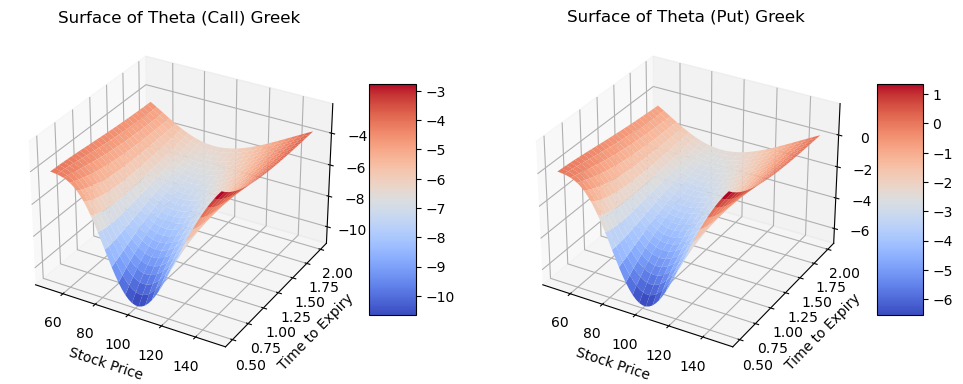

In [61]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D
import scipy.stats as si

# Given parameters
S_min = 50  # Minimum stock price
S_max = 150  # Maximum stock price
K = 105  # Strike price
r = 0.04  # Risk-free interest rate
T_min = 0.5  # Minimum time to expiration in years
T_max = 2  # Maximum time to expiration in years
sigma = 0.3  # Volatility

def theta(S, K, T, r, vol, payoff):
    d1 = (np.log(S / K) + (r + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = d1 - vol * np.sqrt(T)
    
    if payoff == 'call':
        theta = -((S * vol * np.exp(-d1**2 / 2)) / (2 * np.sqrt(T * 2 * np.pi))) - r * K * np.exp(-r * T) * si.norm.cdf(-d2)
    elif payoff == 'put':
        theta = -((S * vol * np.exp(-d1**2 / 2)) / (2 * np.sqrt(T * 2 * np.pi))) + r * K * np.exp(-r * T) * si.norm.cdf(d2)
    else:
        raise ValueError("Invalid option type. Use 'call' or 'put'.")

    return theta

# Generate a range of stock prices and times to expiration
S_range = np.linspace(S_min, S_max, 51)
T_range = np.linspace(T_min, T_max, 51)

# Create a meshgrid for stock prices and times to expiration
S, T = np.meshgrid(S_range, T_range)

# Calculate Theta for each combination of stock price and time to expiration
Theta_call = np.zeros_like(S)
Theta_put = np.zeros_like(S)

for i in range(len(T_range)):
    for j in range(len(S_range)):
        Theta_call[i, j] = theta(S_range[j], K, T_range[i], r, sigma, 'call')
        Theta_put[i, j] = theta(S_range[j], K, T_range[i], r, sigma, 'put')

# Plot the surface of Theta for Call option
fig = plt.figure(figsize=(12, 6))
ax_call = fig.add_subplot(121, projection='3d')
surf_call = ax_call.plot_surface(S, T, Theta_call, cmap=cm.coolwarm, linewidth=0.5, antialiased=True)
ax_call.set_xlabel('Stock Price')
ax_call.set_ylabel('Time to Expiry')
ax_call.set_zlabel('Theta')
ax_call.set_title('Surface of Theta (Call) Greek')
fig.colorbar(surf_call, ax=ax_call, shrink=0.5, aspect=5)

# Plot the surface of Theta for Put option
ax_put = fig.add_subplot(122, projection='3d')
surf_put = ax_put.plot_surface(S, T, Theta_put, cmap=cm.coolwarm, linewidth=0.5, antialiased=True)
ax_put.set_xlabel('Stock Price')
ax_put.set_ylabel('Time to Expiry')
ax_put.set_zlabel('Theta')
ax_put.set_title('Surface of Theta (Put) Greek')
fig.colorbar(surf_put, ax=ax_put, shrink=0.5, aspect=5)

plt.show()


In [58]:
import numpy as np
from scipy.stats import norm

# Define parameters
S = 49.53  # Current stock price
K = 55  # Strike price
r = 0.01  # Risk-free interest rate
T = 0.21  # Time to expiration in years
sigma = 0.95  # Volatility

# Calculate d1 and d2 using the Black-Scholes-Merton formula
d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
d2 = d1 - sigma * np.sqrt(T)

# Calculate rho for a call option
rho_call = K * T * np.exp(-r * T) * norm.cdf(d2)

# Calculate rho for a put option
rho_put = -K * T * np.exp(-r * T) * norm.cdf(-d2)

# Print the rho values
print(f"Rho for Call: {rho_call:.4f}")
print(f"Rho for Put: {rho_put:.4f}")


Rho for Call: 3.7471
Rho for Put: -7.7787


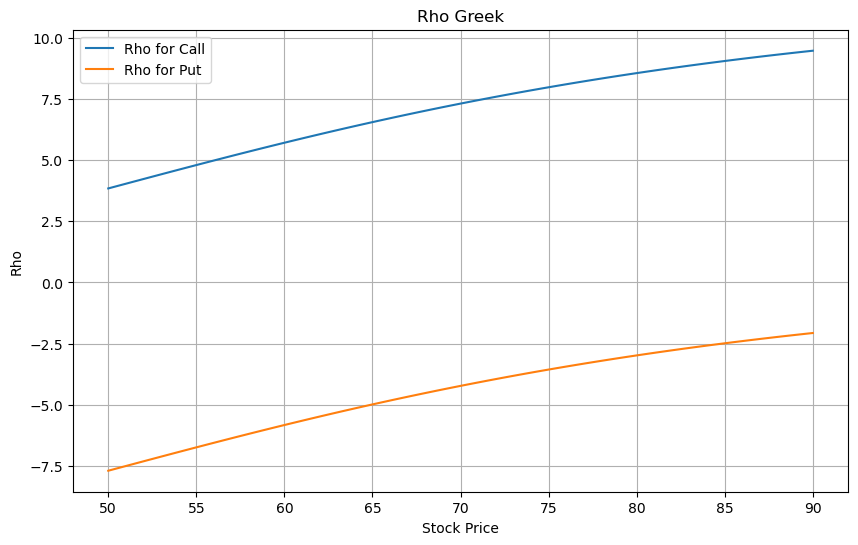

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Define parameters
S_min = 50  # Minimum stock price
S_max = 90  # Maximum stock price
K = 55  # Strike price
r = 0.01  # Risk-free interest rate
T = 0.21  # Time to expiration in years
sigma = 0.95  # Volatility

# Generate a range of stock prices
n_points = 100  # Number of points on the x-axis
S_range = np.linspace(S_min, S_max, n_points)

# Calculate d1 and d2 using the Black-Scholes-Merton formula
d1 = (np.log(S_range / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
d2 = d1 - sigma * np.sqrt(T)

# Calculate Rho for a call option
rho_call = K * T * np.exp(-r * T) * norm.cdf(d2)

# Calculate Rho for a put option
rho_put = -K * T * np.exp(-r * T) * norm.cdf(-d2)

# Plot the rho values
plt.figure(figsize=(10, 6))
plt.plot(S_range, rho_call, label='Rho for Call')
plt.plot(S_range, rho_put, label='Rho for Put')
plt.xlabel('Stock Price')
plt.ylabel('Rho')
plt.title('Rho Greek')
plt.legend()
plt.grid(True)
plt.show()

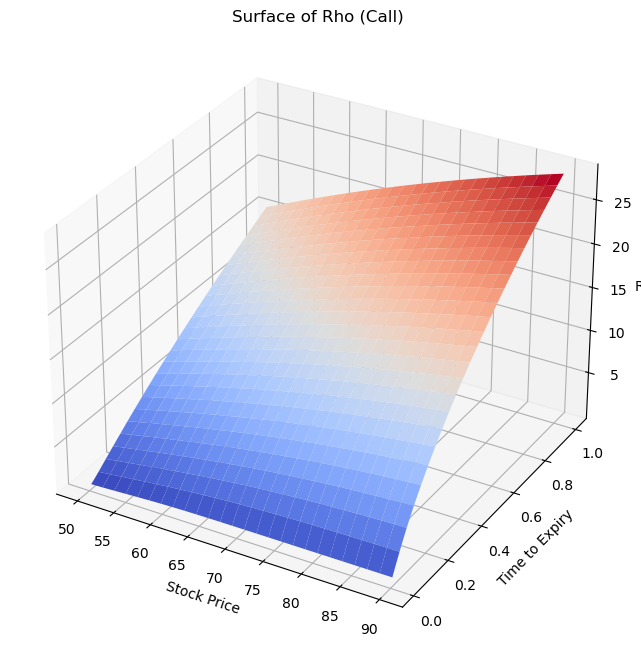

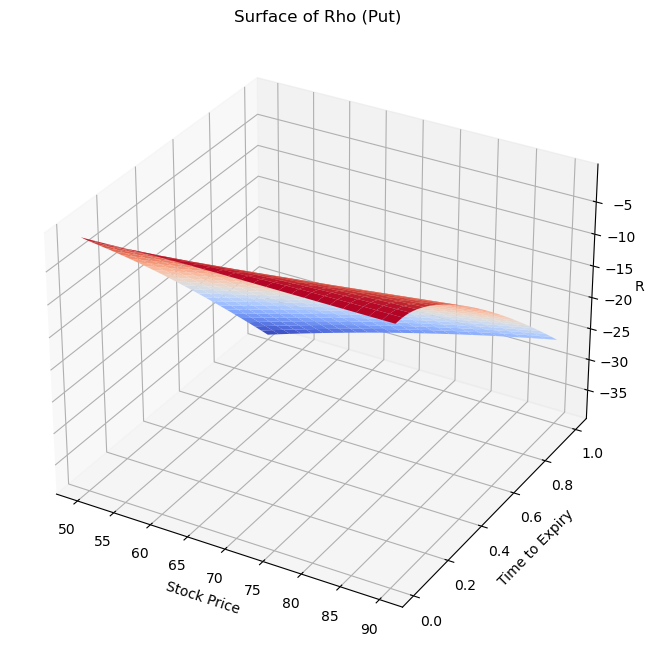

In [64]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import norm

# Define parameters
S_min = 50  # Minimum stock price
S_max = 90  # Maximum stock price
K = 55  # Strike price
r = 0.01  # Risk-free interest rate
T_min = 0.01  # Minimum time to expiration in years
T_max = 1  # Maximum time to expiration in years
sigma = 0.95  # Volatility

def rho(S, K, T, r, vol, payoff):
    d1 = (np.log(S / K) + (r + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = d1 - vol * np.sqrt(T)

    if payoff == 'call':
        rho_value = K * T * np.exp(-r * T) * norm.cdf(d2)
    elif payoff == 'put':
        rho_value = -K * T * np.exp(-r * T) * norm.cdf(-d2)
    else:
        raise ValueError("Invalid payoff type. Use 'call' or 'put'.")

    return rho_value

# Generate a range of stock prices and times to expiration
S_range = np.linspace(S_min, S_max, 51)
T_range = np.linspace(T_min, T_max, 51)

# Create a meshgrid for stock prices and times to expiration
S, T = np.meshgrid(S_range, T_range)

# Calculate Rho for each combination of stock price and time to expiration
Rho_call = np.zeros_like(S)
Rho_put = np.zeros_like(S)

for i in range(len(T_range)):
    for j in range(len(S_range)):
        Rho_call[i, j] = rho(S_range[j], K, T_range[i], r, sigma, 'call')
        Rho_put[i, j] = rho(S_range[j], K, T_range[i], r, sigma, 'put')

# Plot the surface of Rho for both call and put options
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot for Call option
surf_call = ax.plot_surface(S, T, Rho_call, cmap=cm.coolwarm, linewidth=0.5, antialiased=True, label='Call')
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Rho')
ax.set_title('Surface of Rho (Call)')

# Plot for Put option
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
surf_put = ax.plot_surface(S, T, Rho_put, cmap=cm.coolwarm, linewidth=0.5, antialiased=True, label='Put')
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Rho')
ax.set_title('Surface of Rho (Put)')

plt.show()
